In [2]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import os
import matplotlib.pyplot as plt
from os import path
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import HTMLParser

%matplotlib inline

### Scraping Text

In [4]:
# make a list of search page urls
unsearched_urls = []
unsearched_urls.append('http://www.jamesaltucher.com/')
for i in range(1,5):    
    unsearched_urls.append('http://www.jamesaltucher.com/page/%d/' % i)

In [5]:
# make a list of blog links
links = []
for url in unsearched_urls:
    request = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = bs(request.text) 
    re_search = 'http\:\/\/www\.jamesaltucher\.com\/\d+\/\d+\/[^ ]+?(?=\/)'
    links += re.findall(re_search, str(soup))
links = list(set(links))

In [6]:
# make a list of clean text of each blog
text_list = []
for link in links:
    request = requests.get(link, headers={'User-Agent': 'Mozilla/5.0'})
    soup = bs(request.text) 
    some_elements = soup.find_all( "section", class_ ='post-content clearfix' )
    text_body = re.sub(u'\<.*?\>', ' ', str(some_elements[0]))
    text_body = text_body.decode("utf-8").replace(u'\u2019', u'\'').encode('ascii', 'ignore')
    text_body = text_body.replace('\n', '')
    text_list.append(text_body)

In [7]:
# getting title names
titles = links
titles = [re.sub(u'http\:\/\/www.jamesaltucher.com\/\d+\/\d+\/', '', title) for title in titles]
titles = [title.replace('-', ' ') for title in titles]

### Saving Text

In [8]:
# saving text to csv
text_df = pd.DataFrame(text_list, columns = ['Blogs'], index = [titles])

In [11]:
text_df.to_csv('text_df.csv')

### Reading Text

In [16]:
text_df = pd.read_csv('text_df.csv', index_col = 0)

In [22]:
words = ''.join(text_df.Blogs)

### Word Cloud

In [24]:
def create_wordcloud(words, image_file, bg_color, font_size = 100, max_words = 10000, size = (15,10)):
    d = path.dirname("__file__")

    coloring = imread(path.join(d, image_file))

    wc = WordCloud(background_color=bg_color, 
                   font_path = os.environ.get("FONT_PATH", "/Library/Fonts/Times New Roman.ttf"),
                   mask=coloring,
                   stopwords=STOPWORDS.add("said"),
                   max_font_size= font_size, random_state=0, max_words = max_words)
    # generate word cloud
    wc.generate(words)

    # create coloring from image
    image_colors = ImageColorGenerator(coloring)


    fig, ax = plt.subplots(1,1, figsize=(15,10))

    ax.imshow(wc.recolor(color_func=image_colors), alpha=1)
    ax.axis("off")

    plt.show()

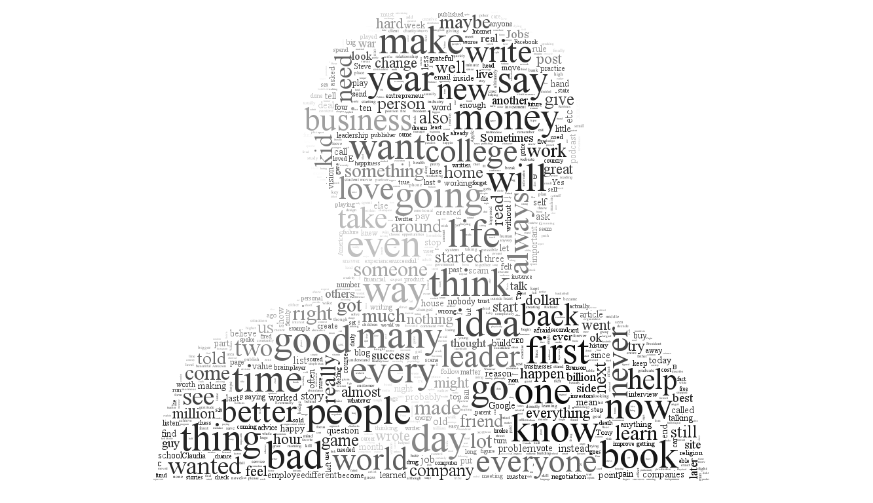

In [33]:
create_wordcloud(words, 'maxresdefault.jpg', 'white', 60)

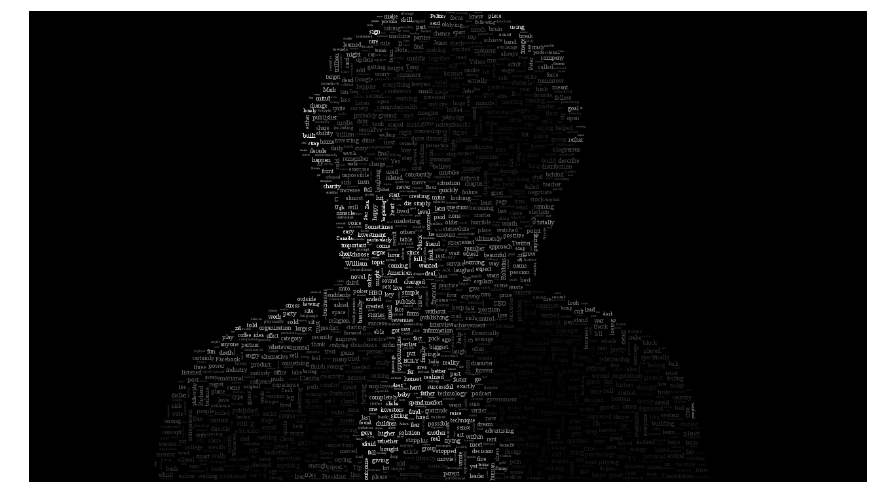

In [34]:
create_wordcloud(words, 'maxresdefault.jpg', 'black', 10)